In [10]:
import os
participants_data_filename = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/Doc Unificado 30072025.xlsx"
pelvis_mri_results_path = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/nifti_pelvis/"
lumbar_mri_results_path = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/nifti_pelvis/"
output_dir = "/home/martin/data_imaging/Muscle/data_sarcopenia_tx/statistical_analysis/"

volume_ff_filename_per_subject = "volumes_and_ffs.csv"
column_names = ["VOL_LGMAX", "VOL_LGMED", "VOL_LGMIN", "VOL_LTFL", "VOL_RGMAX", "VOL_RGMED", "VOL_RGMIN", "VOL_RTFL",
                "FF_LGMAX", "FF_LGMED", "FF_LGMIN", "FF_LTFL", "FF_RGMAX", "FF_RGMED", "FF_RGMIN", "FF_RTFL"]
os.makedirs(output_dir, exist_ok=True)

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy.stats as stats

# Load the data
data = pd.read_excel(participants_data_filename, sheet_name='Doc Unificado')


In [ ]:
import glob

# Get all subfolders in pelvis_mri_results_path
subfolders = [f.path for f in os.scandir(pelvis_mri_results_path) if f.is_dir()]

# For each subfolder, match to ID and add volume/ff data
for folder in subfolders:
    folder_name = os.path.basename(folder)
    # Find matching row in data
    idx = data.index[data['ID'] == folder_name]
    if not idx.empty:
        csv_path = os.path.join(folder, volume_ff_filename_per_subject)
        if os.path.exists(csv_path):
            vol_ff_df = pd.read_csv(csv_path, header=None)
            # Assuming single row, add columns to data
            for col in vol_ff_df.columns:
                # Assign values to named columns using column_names
                if col > 0 and col <= len(column_names):
                    data.loc[idx, column_names[col-1]] = vol_ff_df.iloc[0][col]

# Save the combined data to a new CSV file
combined_data_path = os.path.join(output_dir, "combined_data.csv")
data.to_csv(combined_data_path, index=False)
print(f"Combined data saved to {combined_data_path}")

      0              1              2           3             4   \
0  S0001  754797.337847  351635.605376  78974.3776  26695.476636   

              5             6             7             8         9   \
0  791885.448768  354544.04987  85094.553583  25182.152308  0.045539   

         10        11       12        13        14        15        16  
0  0.049175  0.088153  0.02028  0.042518  0.050819  0.078845  0.045222  
      0              1              2             3            4   \
0  S0002  731024.303567  267211.393813  54490.563035  61763.22959   

              5              6             7             8         9   \
0  697640.959911  280739.549008  74708.140569  42228.436619  0.122811   

        10        11        12        13        14       15        16  
0  0.08425  0.112308  0.163483  0.128438  0.075847  0.11388  0.179276  
      0              1              2           3             4   \
0  S0003  697869.591644  268790.041493  66522.5024  37635.582826   

     

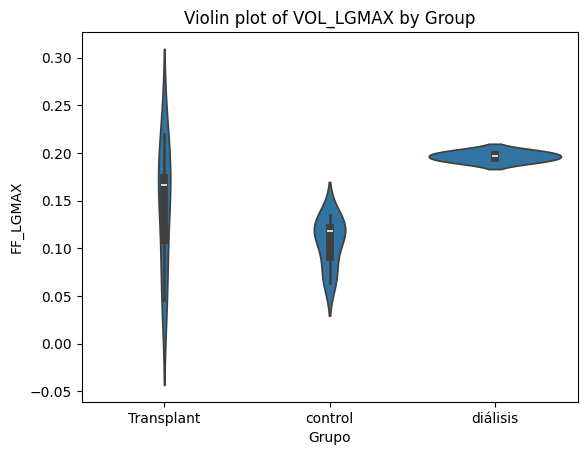

In [ ]:
filtered_data = data[data['VOL_LGMAX'].notna()].copy()
filtered_data['Grupo'] = filtered_data['Grupo'].replace({'trasplantado': 'Transplant', 'trasplantada': 'Transplant'})
sns.violinplot(x='Grupo', y='FF_LGMAX', data=filtered_data)
plt.title('Violin plot of VOL_LGMAX by Group')
plt.show()

sns.boxplot(x='Grupo', y='FF_LGMAX', data=filtered_data, showfliers=False)
sns.stripplot(x='Grupo', y='FF_LGMAX', data=filtered_data, color='black', alpha=0.6, jitter=True)
plt.title('Boxplot of FF_LGMAX by Group with Data Points')
plt.show()

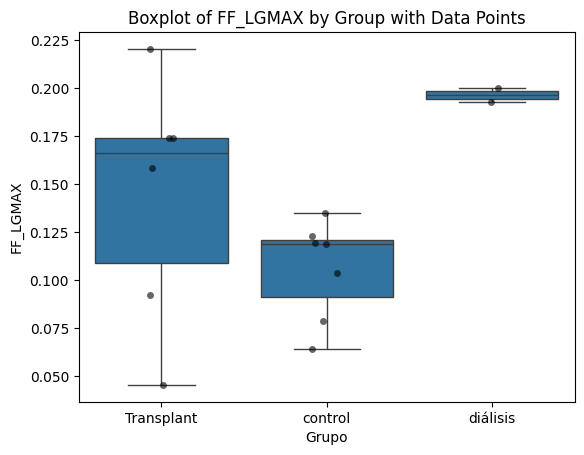

In [14]:
sns.boxplot(x='Grupo', y='FF_LGMAX', data=filtered_data, showfliers=False)
sns.stripplot(x='Grupo', y='FF_LGMAX', data=filtered_data, color='black', alpha=0.6, jitter=True)
plt.title('Boxplot of FF_LGMAX by Group with Data Points')
plt.show()
